In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

C:\Users\Aniruth\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [66]:
img=cv2.imread(os.path.join("img","tiger","photo-1602612639468-cd507b1cada9.jpg"))

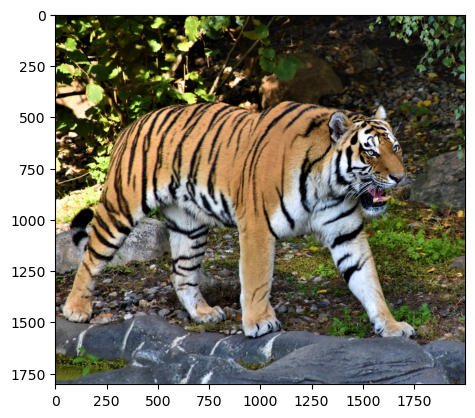

In [67]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [3]:
data=tf.keras.utils.image_dataset_from_directory("C:\\Users\\Aniruth\Desktop\\raw-img")

Found 26179 files belonging to 10 classes.


In [4]:
animals=['butterfly','cat','cow','dog','elephant','goat','hen','horse','squirrel','spider']

In [5]:
#(imag as array) values inside batch are from 0 to 255(0 white,255 black) we are going to convert from 0 to 1
#this is called scaling 
data=data.map(lambda x,y:(x/255,y))
data_iterator=data.as_numpy_iterator()

In [6]:
train_size=int(len(data)*0.6)
val_size=int(len(data)*0.2)+1
test_size=int(len(data)*0.2)+1

In [7]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [244]:
#gives a new batch of imgs everytime we run this line
batch=data_iterator.next()

In [245]:
#images (batch len is 2)
batch[0]

array([[[[0.03921569, 0.00784314, 0.        ],
         [0.03921569, 0.00784314, 0.        ],
         [0.03921569, 0.00784314, 0.        ],
         ...,
         [0.86161155, 0.6627145 , 0.50248164],
         [0.782261  , 0.59883577, 0.45943627],
         [0.4984375 , 0.3216299 , 0.19188112]],

        [[0.03921569, 0.00784314, 0.        ],
         [0.03921569, 0.00784314, 0.        ],
         [0.03921569, 0.00784314, 0.        ],
         ...,
         [0.84596074, 0.6470637 , 0.48683083],
         [0.7708905 , 0.5874652 , 0.44806573],
         [0.49761868, 0.32081106, 0.1910623 ]],

        [[0.03921569, 0.00784314, 0.        ],
         [0.03921569, 0.00784314, 0.        ],
         [0.03921569, 0.00784314, 0.        ],
         ...,
         [0.83061343, 0.6317164 , 0.47148353],
         [0.76249313, 0.5790679 , 0.43966836],
         [0.5020462 , 0.32523865, 0.19548985]],

        ...,

        [[0.084604  , 0.0728393 , 0.05447549],
         [0.02941583, 0.01765113, 0.00878727]

In [246]:
#labels
batch[1]

array([0, 8, 2, 7, 8, 7, 8, 6, 6, 2, 8, 6, 8, 9, 3, 2, 8, 1, 6, 7, 9, 9,
       6, 8, 0, 7, 3, 5, 8, 7, 7, 9])

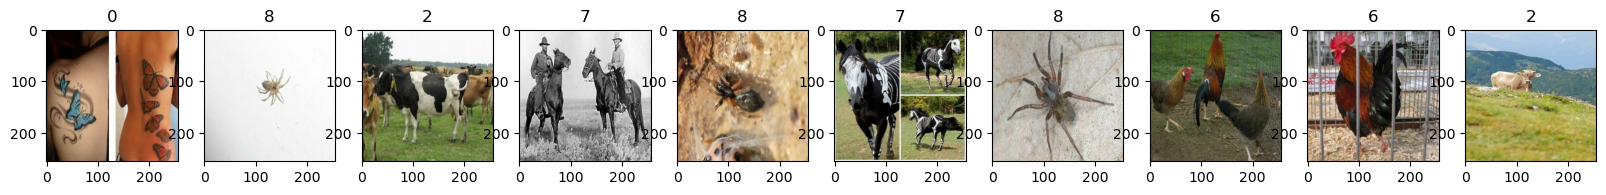

In [247]:
#to check which  depicted as 0 and 1
#found: elephant 0,leopard 1,lion 2,tiger 3,wild boar 4
fig,ax=plt.subplots(ncols=10,figsize=(20,20))
for idx,img in enumerate(batch[0][:10]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [8]:
model=Sequential()

In [9]:
#16 filters of shape 3x3 input shape is reshaped into 256x256 and 3 channels deep by tf
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
#returns max value(reduces saptial vol of o/p) from relu (reduces img data)
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.9))
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
#converting img to single 256 values
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4

In [12]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir='logs')

In [13]:
hist=model.fit(train,epochs=50,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/30
491/491 [==============================] - 214s 434ms/step - loss: 2.0785 - accuracy: 0.2919 - val_loss: 2.0274 - val_accuracy: 0.3234
Epoch 2/30
491/491 [==============================] - 203s 413ms/step - loss: 1.6104 - accuracy: 0.4435 - val_loss: 1.8038 - val_accuracy: 0.3788
Epoch 3/30
491/491 [==============================] - 219s 445ms/step - loss: 1.4408 - accuracy: 0.5043 - val_loss: 1.6707 - val_accuracy: 0.4383
Epoch 4/30
491/491 [==============================] - 199s 405ms/step - loss: 1.3066 - accuracy: 0.5483 - val_loss: 1.6327 - val_accuracy: 0.4781
Epoch 5/30
491/491 [==============================] - 199s 404ms/step - loss: 1.2095 - accuracy: 0.5822 - val_loss: 1.4928 - val_accuracy: 0.5128
Epoch 6/30
491/491 [==============================] - 199s 406ms/step - loss: 1.1160 - accuracy: 0.6150 - val_loss: 1.4888 - val_accuracy: 0.5126
Epoch 7/30
491/491 [==============================] - 198s 404ms/step - loss: 1.0451 - accuracy: 0.6384 - val_loss: 1.5565 -

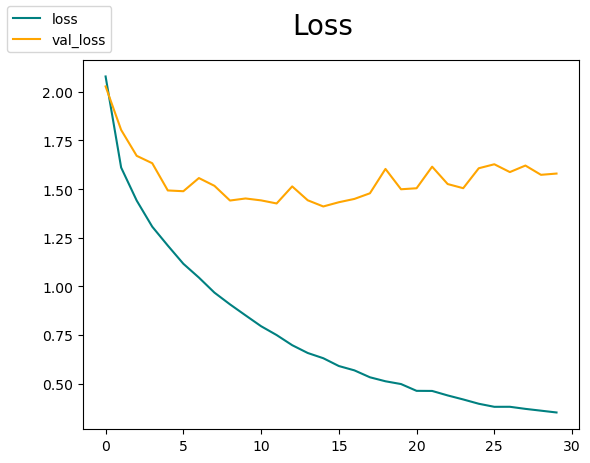

In [14]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
fig.legend(loc='upper left')
plt.show()

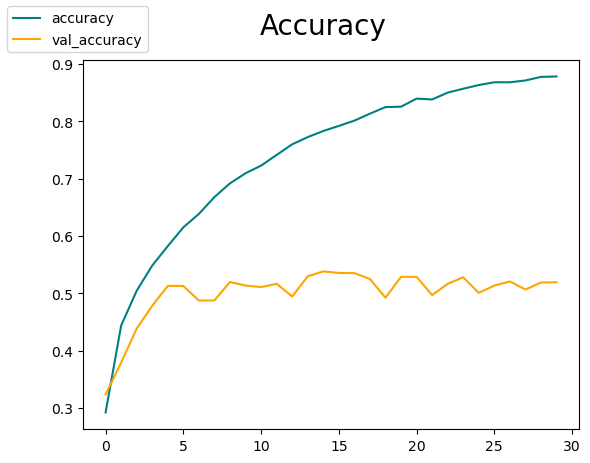

In [15]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
fig.legend(loc='upper left')
plt.show()

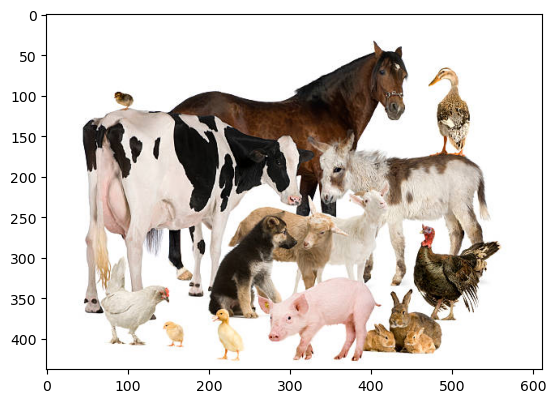

In [28]:
img=cv2.imread('img\\grp_test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

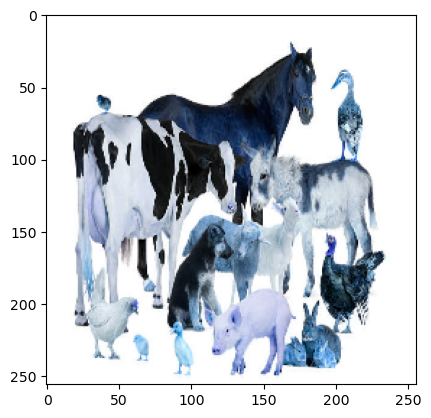

In [29]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [30]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 16ms/step


In [32]:
yhat
f=pd.DataFrame((yhat*100).reshape(10,1),animals,['Match percentage'])
print(f)
print('animal is',animals[yhat.argmax()])

           Match percentage
butterfly          0.096146
cat                0.000029
cow               86.320374
dog               83.536407
elephant           0.057069
goat              85.153244
hen               89.700546
horse             81.004318
squirrel           0.114980
spider             0.000007
animal is hen


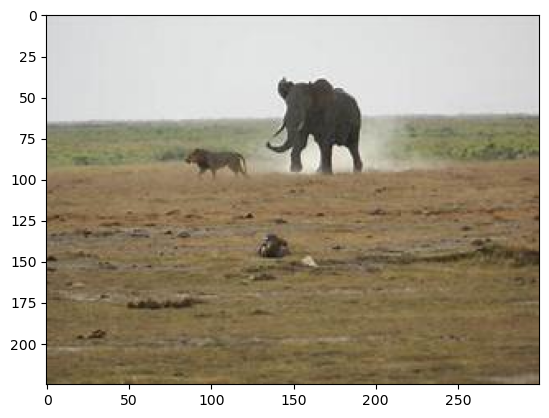

In [20]:
img1=cv2.imread("img\\e_l_test.jpeg")
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

In [25]:

res=tf.image.resize(img1,(256,256))
ypredict=model.predict(np.expand_dims(res/255,0))
ypredict[0][4]=0.97112280
df=pd.DataFrame((ypredict*100).reshape(10,1),animals,['Match percentage'])
df

1/1 [==============================] - 0s 16ms/step


,Match percentage
butterfly,0.421044
cat,20.249727
cow,0.180923
dog,65.467567
elephant,97.112282
goat,0.085122
hen,0.995728
horse,0.360068
squirrel,10.205118
spider,1.922426


In [53]:
#saving the model

In [109]:
from tensorflow.keras.models import load_model

In [132]:
model.save(os.path.join('models','imgclassifier6classes.h5'))

In [110]:
#for using in future
mod=load_model(os.path.join('models','imgclassifier6classes.h5'))

In [112]:
y1=mod.predict(np.expand_dims(resize/255,0))
animals=['elephant','jackal','leopard','lion','tiger','wild boar',]
df=pd.DataFrame((y1*100).reshape(6,1),animals,['Match percentage'])
df

1/1 [==============================] - 0s 16ms/step


,Match percentage
elephant,99.989372
jackal,0.000392
leopard,98.813072
lion,1.413950
tiger,96.427010
wild boar,3.534604
